In [115]:
# import modules
import urllib.request
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [123]:
# Load the JARVIS dataset
url = 'https://ndownloader.figshare.com/files/14146319' 
urllib.request.urlretrieve(url, 'jff2.json') 
f=open('jff2.json','r')
data=json.load(f)
f.close()

# Show the first item
data[0]

{'c44': 25.1,
 'Gv': 29.6,
 'search': 'Ag',
 'name': 'JLMP-1079',
 'surf_val': [0.8582640971273426,
  0.9334963319196496,
  0.9360461382184894,
  0.9419095687284446,
  0.9802042233627004,
  0.9875446840480956,
  1.0120634294466684,
  1.0126231880823566,
  1.0241538763302507,
  1.0315901848682645,
  1.0318271257831195,
  1.0331286888257398,
  1.0344297141291043,
  1.0388709097092674,
  1.040277640596931,
  1.042494119906149,
  1.04453679643896,
  1.0450598648770613,
  1.045076130339553,
  1.0469310544190567,
  1.0491015867538047,
  1.0495494553198788,
  1.0534717916897114,
  1.0535201391639715,
  1.054233162444997,
  1.0579157863887743,
  1.0595676718662346,
  1.0601381085497692,
  1.109580394178689],
 'defect_val': [1.086429999999973, 1.0916199999999434],
 'defect_name': ['vacancy_1_mult-2_sitespecie-Ag',
  'vacancy_2_mult-2_sitespecie-Ag'],
 'surf_name': ['0_0_1',
  '2_0_3',
  '2_0_1',
  '1_0_1',
  '3_0_2',
  '1_0_3',
  '3_1_1',
  '3_0_1',
  '3_1_3',
  '3_-1_1',
  '3_1_0',
  '3_2_1',


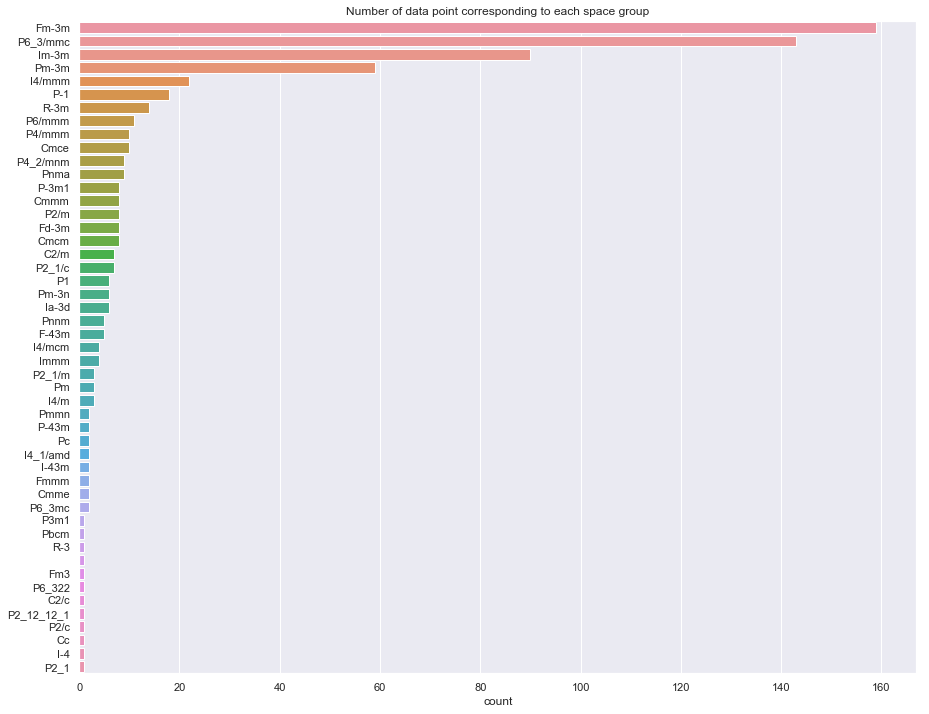

In [125]:
# Create the space group array
sg_array = []
for d in data:
    if d['sg'] is not '':
        sg_array.append(d['sg'])
    else:
        sg_array.append('')

# Count the number of points for each space group
sg_hist = Counter()
for sg in sg_array:
     sg_hist[sg] += 1

# Sort the space groups from the largest number of points to the smalest
sg_sorted = [item[0] for item in sorted(sg_hist.items() , reverse=True, key=lambda x: x[1])]

# Plot the corresponding histogram
plt.rcParams['figure.figsize'] = [15, 12]
plt.title("Number of data point corresponding to each space group")
sns.set(style="darkgrid")
ax = sns.countplot(y=sg_array, order = sg_sorted)

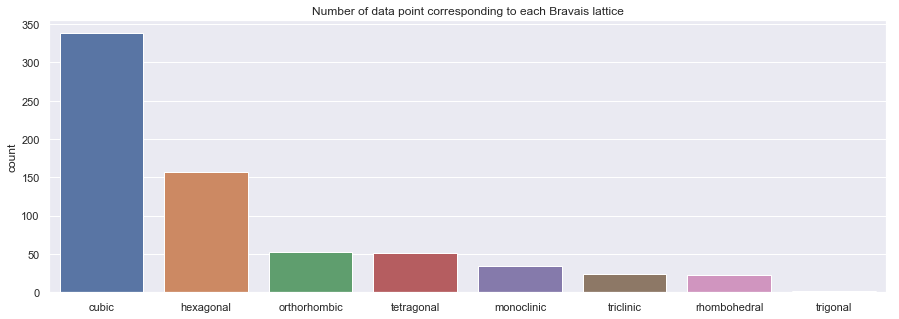

In [131]:
# Set Bravais lattices corresponding to the space groups explored above
Bravais_lattices = {'cubic' : {'Fm-3m','Im-3m','Pm-3m','Fd-3m','Pm-3n','Ia-3d','F-43m','P-43m','I-43m','Fm3'},
                    'hexagonal' : {'P6_3/mmc','P6/mmm','P6_3mc','P6_322'},
                    'tetragonal' : {'I4/mmm','P4/mmm','P4_2/mnm','I4/mcm','I4/m','I4_1/amd','I-4'},
                    'triclinic' : {'P-1','P1'},
                    'rhombohedral' : {'R-3m','P-3m1'},
                    'orthorhombic' : {'Cmce','Pnma','Cmmm','Cmcm','Pnnm','Immm','Pmmn','Fmmm','Cmme','Pbcm','P2_12_12_1'},
                    'monoclinic' : {'P2/m','C2/m','P2_1/c','P2_1/m','Pm','Pc','C2/c','P2/c','Cc','P2_1'},
                    'trigonal' : {'P3m1','R-3'}}

# Create the Bravais lattice array
bl_array = []
for d in data:
    for bl in Bravais_lattices.items():
        if d['sg'] in bl[1]:
            bl_array.append(bl[0])

# Count the number of points for each Bravais lattice
bl_hist = Counter()
for bl in bl_array:
     bl_hist[bl] += 1            
            
# Sort the Bravais lattices from the largest number of points to the smalest
bl_sorted = [item[0] for item in sorted(bl_hist.items() , reverse=True, key=lambda x: x[1])]         
            
# Plot the corresponding histogram
plt.rcParams['figure.figsize'] = [15, 5]
plt.title("Number of data point corresponding to each Bravais lattice")
sns.set(style="darkgrid")
ax = sns.countplot(x=bl_array, order=bl_sorted)

In [ ]:
# Create the material array
formula_array = []
for d in data:
    formula_array.append(d['formula'])

# Count the number of points for each material
formula_hist = Counter()
for formula in formula_array:
     formula_hist[formula] += 1

# Sort the materials from the largest number of points to the smalest
formula_sorted = [item[0] for item in sorted(formula_hist.items() , reverse=True, key=lambda x: x[1])]
sg_sorted

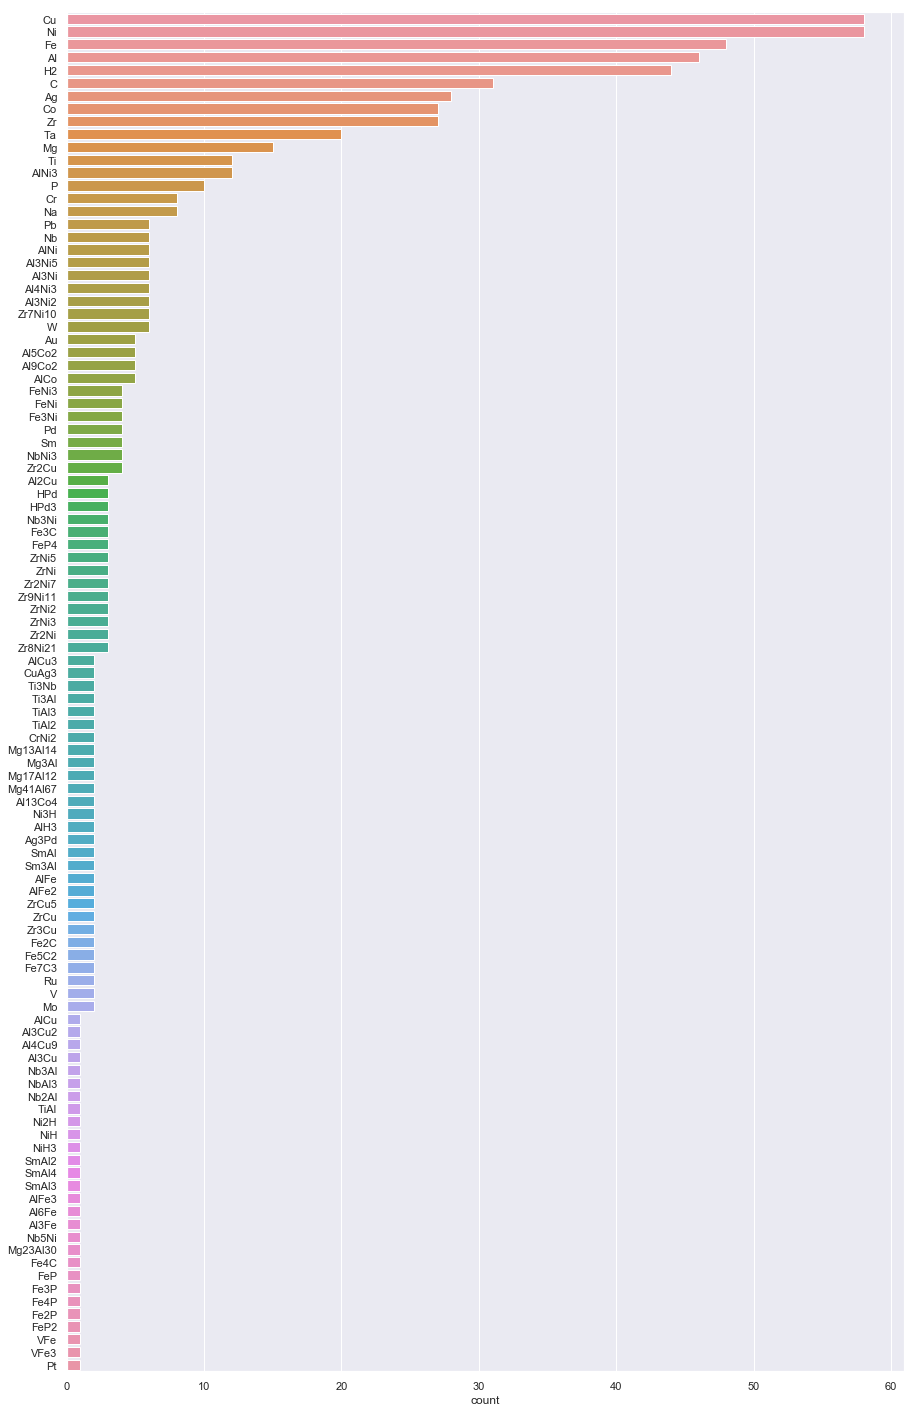

In [110]:
plt.rcParams['figure.figsize'] = [15, 25]
ax = sns.countplot(y=formula_array, order = formula_sorted)

In [72]:
a = np.sort(np.abs(np.asarray('-1_3_-2'.split('_'), dtype=int)))
print(a)
b = np.sort(np.abs(np.asarray('2_3_-1'.split('_'), dtype=int)))
print(b)
if (a == b).all():
    print(1)
if all([i == j for i,j in zip(a,b)]):
    print(1)

[1 2 3]
[1 2 3]
1
1


In [ ]:
# 100, 110, 210, 310, 320, 111, 211, 311, 221, 321, 331, 322, 332